# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)

#to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

#to compute distances
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score # unsupervised learning

# deep learning library
import torch

# to import the models
from sentence_transformers import SentenceTransformer

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
reviews = pd.read_csv('resources/news_articles.csv')

# creating a copy of the dataframe
data = reviews.copy()

# get the 1st top 5 rows
data.head()

,Text
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n"
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots

Data Overview

In [3]:
data.loc[0, 'Text']

'Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour\'s bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n  - A freeze on petrol duty \n  - An extension of tax credit scheme for poorer families \n  - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties\' general election manifestos. Ten years ago, buyers had a much g

In [4]:
data.shape

(2225, 1)

In [5]:
data.isnull().sum()

Text    0
dtype: int64

In [6]:
data.duplicated().sum()

98

In [7]:
# duplicate
data = data.drop_duplicates()

In [8]:
# resetting the dataframe index
data.reset_index(drop=True, inplace=True)

Removing Duplicated Values

In [9]:
data.shape

(2127, 1)

## **Model Building**

We'll be using the **all-MiniLM-L6-v2** model here.

💡 The **all-MiniLM-L6-v2** model is an all-round (**all**) model trained on a large and diverse dataset of over 1 billion training samples and generates state-of-the-art sentence embeddings of 384 dimensions.

📊  It is a language model (**LM**) that has 6 transformer encoder layers (**L6**) and is a smaller model (**Mini**) trained to mimic the performance of a larger model (BERT).

🛠️ Potential use-cases include text classification, sentiment analysis, and semantic search.

In [10]:
from sentence_transformers import SentenceTransformer

# Defining the model
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

In [11]:
device = "cuda" if torch.cuda.is_available() else "cpu"
embedding_matrix = model.encode(data["Text"].tolist(), show_progress_bar=True, device=device)
embedding_matrix.shape

Batches:   0%|          | 0/67 [00:00<?, ?it/s]

(2127, 384)

- Each news article has been converted to a 384-dimensional vector

In [12]:
# printing the embedding vector of the first review in the dataset
len(embedding_matrix[0])

384

### Semantic Search

In [13]:
# defining a function to compute the cosine similarity between two embeddings vectors


a = "i love apple"
b = "apple is a fruit"
c = "i like this table"


def cosine_score(text1, text2) :
    # encoding the text
    embeddings1 = model.encode(text1)
    embeddings2 = model.encode(text2)

    # calculating the L2 normm of the embeddings vectors
    norm1 = np.linalg.norm(embeddings1)
    norm2 = np.linalg.norm(embeddings2)
    
    #computing the cosine similarity
    cosine_similarity_score = ((np.dot(embeddings1, embeddings2)) / (norm1 * norm2))

    return cosine_similarity_score

In [14]:
print(cosine_score(a, b))
print(cosine_score(b, c))
print(cosine_score(a, c))

0.5575027
0.07198233
0.27396196


In [15]:
# ussing prebuilt method
from sentence_transformers import util

embeddings1 = model.encode(a)
embeddings2 = model.encode(b)
embeddings3 = model.encode(c)

print(util.cos_sim(embeddings1, embeddings2))
print(util.cos_sim(embeddings2, embeddings3))
print(util.cos_sim(embeddings1, embeddings3))

tensor([[0.5575]])
tensor([[0.0720]])
tensor([[0.2740]])


In [16]:
# defining a function to find the top k similar sentences for a given query
def top_k_similar_sentences(embedding_matrix, query_text, k):
    # encoding the query text
    query_embedding = model.encode(query_text)

    # calculating the cosine similarity between the query vector and all other encoded vectors of our dataset
    score_vector = np.dot(embedding_matrix,query_embedding)

    # sorting the scores in descending order and choosing the first k
    top_k_indices = np.argsort(score_vector)[::-1][:k]

    # returning the corresponding reviews
    return data.loc[list(top_k_indices), 'Text']

In [17]:
# defining the query text
query_text = "Budget for elections"

# displaying the top 3 similar sentences
top_k_reviews = top_k_similar_sentences(embedding_matrix, query_text, 3)

for i in top_k_reviews:
    print(i, end="\n")
    print("*******************************************************************")
    print("\n")

'Debate needed' on donations cap
 
 A cap on donations to political parties should not be introduced yet, the elections watchdog has said.
 
 Fears that big donors can buy political favours have sparked calls for a limit. In a new report, the Electoral Commission says it is worth debating a Â£10,000 cap for the future but now is not the right time to introduce it. It also says there should be more state funding for political parties and candidates should be able to spend more on election campaigning.
 
 There were almost Â£68m in reported donations to political parties in 2001, 2002 and 2003, with nearly Â£12m of them from individual gifts worth more than Â£1m. The rules have already been changed so the public can see who gives how much to the parties but the report says there are still public suspicions. The commission says capping donations would mean taxpayers giving parties more cash - something which would first have to be acceptable to the public and shown to work. "While we are 

In [18]:
# defining the query text
query_text = "High imports and exports"

# displaying the top 3 similar sentences
top_k_reviews = top_k_similar_sentences(embedding_matrix, query_text, 3)

for i in top_k_reviews:
    print(i, end="\n")
    print("*******************************************************************")
    print("\n")

US trade gap ballooned in October
 
 The US trade deficit widened by more than expected in October, hitting record levels after higher oil prices raised import costs, figures have shown
 
 The trade shortfall was $55.5bn (Â£29bn), up 9% from September, the Commerce Department said. That pushed the 10 month deficit to $500.5bn. Imports rose by 3.4%, while exports increased by only 0.6%. A weaker dollar also increased the cost of imports, though this should help drive export demand in coming months. "Things are getting worse, but that's to be expected," said David Wyss of Standard & Poor's in New York. "The first thing is that when the dollar goes down, it increases the price of imports. "We are seeing improved export orders. Things seem to be going in the right direction."
 
 Despite this optimism, significant concerns remain as to how the US will fund its trade and budget deficits should they continue to widen. Another problem highlighted by analysts was the growing trade gap with Chin

In [19]:
meanDistortions = []
clusters = range(2, 19)

from sklearn.cluster import KMeans

for k in clusters:
    clusterer = KMeans(n_clusters=k, random_state=1)
    clusterer.fit(embedding_matrix)

    prediction = clusterer.predict(embedding_matrix)

    distortion = sum(
        np.min(cdist(embedding_matrix, clusterer.cluster_centers_, "euclidean"), axis=1) ** 2
    )
    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Number of Clusters: 2 	Average Distortion: 1795.3091344785412
Number of Clusters: 3 	Average Distortion: 1737.298034609517
Number of Clusters: 4 	Average Distortion: 1666.670300087468
Number of Clusters: 5 	Average Distortion: 1621.4823903651627
Number of Clusters: 6 	Average Distortion: 1591.502747779611
Number of Clusters: 7 	Average Distortion: 1577.1054198417285
Number of Clusters: 8 	Average Distortion: 1571.6843727506803
Number of Clusters: 9 	Average Distortion: 1559.9433188095666
Number of Clusters: 10 	Average Distortion: 1534.3992300763007
Number of Clusters: 11 	Average Distortion: 1525.5192432109197
Number of Clusters: 12 	Average Distortion: 1502.2302276583837
Number of Clusters: 13 	Average Distortion: 1489.3115317595273
Number of Clusters: 14 	Average Distortion: 1468.568455420257
Number of Clusters: 15 	Average Distortion: 1462.5582673981662
Number of Clusters: 16 	Average Distortion: 1455.1084301220014
Number of Clusters: 17 	Average Distortion: 1451.614704573911
Numbe

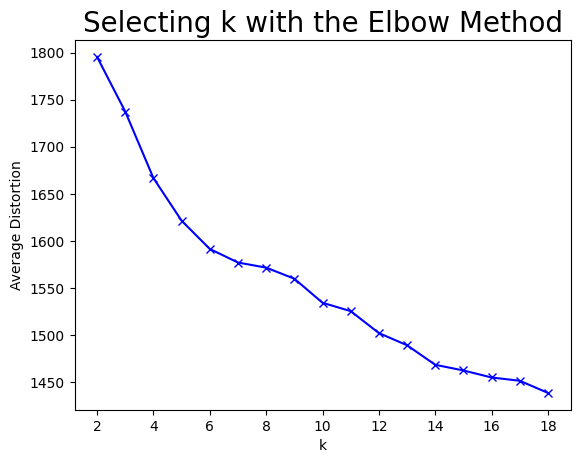

In [20]:
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

In [21]:
sil_score = []
cluster_list = range(2, 11)

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)

    preds = clusterer.fit_predict((embedding_matrix))

    score = silhouette_score(embedding_matrix, preds)
    sil_score.append(score)

    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.046811509877443314)
For n_clusters = 3, the silhouette score is 0.04964283108711243)
For n_clusters = 4, the silhouette score is 0.06065065786242485)
For n_clusters = 5, the silhouette score is 0.06735046207904816)
For n_clusters = 6, the silhouette score is 0.06096599996089935)
For n_clusters = 7, the silhouette score is 0.05802200734615326)
For n_clusters = 8, the silhouette score is 0.05344569310545921)
For n_clusters = 9, the silhouette score is 0.05067500099539757)
For n_clusters = 10, the silhouette score is 0.04589764401316643)


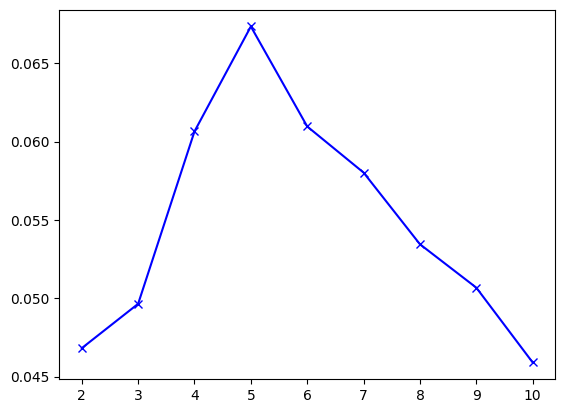

In [22]:
plt.plot(cluster_list, sil_score, "bx-")
plt.show()

- The silhouette coefficient for 5 clusters is the highest.
- So, we will proceed with 5 clusters.

In [23]:
# defining the number of clusters/categories
n_categories = 5

# fitting the model
kmeans = KMeans(n_clusters=n_categories, random_state=1).fit(embedding_matrix)

In [24]:
# checking the cluster centers
centers = kmeans.cluster_centers_
centers

array([[-0.01785407,  0.00624582, -0.00339485, ..., -0.06009003,
        -0.03252156,  0.01114388],
       [ 0.00549149, -0.02162499,  0.01707269, ..., -0.03975473,
        -0.01703278,  0.01147507],
       [-0.01044313, -0.04308651, -0.01626262, ..., -0.06730247,
        -0.00805319,  0.00465481],
       [-0.01394476, -0.03756041,  0.00739343, ..., -0.10312265,
        -0.01400103,  0.03134287],
       [-0.02824864, -0.03118991,  0.00693417, ..., -0.05258855,
         0.00538872,  0.03337955]], dtype=float32)

In [25]:
kmeans.labels_

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [26]:
# creating a copy of the data
clustered_data = data.copy()

# assigning the cluster/category labels
clustered_data['Category'] = kmeans.labels_

clustered_data.head()

,Text,Category
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n",1
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the 

In [27]:
clustered_data.sample(5)

,Text,Category
436,"Campbell to extend sprint career\n \n Darren Campbell has set his sights on running quicker than ever after deciding not to retire from sprinting.\n \n Campbell, who won Olympic 4x100m relay gold, had been unsure about his future. But he told Five Live's Sportsweek: ""I had to get back into training before I could decide because if I didn't have the same hunger I'd have to walk away. ""I've started back and I'm thoroughly enjoying it. I'm looking forward to it. I've got to run under 10 seconds (for 100m) and under 20 seconds (for 200m)."" Campbell was part of the British quartet who shocked the Americans to win relay gold in Athens in August.\n \n The Newport-based athlete and team-mates Jason Gardener, Marlon Devonish and Mark Lewis-Francis were rewarded with MBEs in the New Year Honours List. Campbell's relay triumph made up for his disappointing displays in the individual 100m and 200m events in Athens, when he failed to reach the finals. The 31-year-old, who won Olympic 200m silver in Sydney in 2000, said during the Games that a hamstring injury had stopped him from running at his best.\n \n He was criticised at the time by former Olympic champion Michael Johnson, who cast doubt on Campbell's injury claims. ""To go to Athens and finally get the gold I've been trying to get for 24 years was a big relief,"" said Campbell. ""It was a chance for me to prove that if I'd been fit I would have been challenging for the (individual) medals. ""Every season I go and challenge for the medals so why would last season have been any different? ""It's just unfortunate that I picked up that injury just before the Olympics."" Campbell set his 100m personal best of 10.04secs when he won the European title in Budapest in 1998. And he ran 20.13secs in the quarter-finals of the 200m in Sydney on the way to Olympic silver.\n",0
1873,"Italy to get economic action plan\n \n Italian Prime Minister Silvio Berlusconi will unveil plans aimed at kickstarting the country's sputtering economy on Thursday night in Rome.\n \n He will present an ""Action Plan for the Development of Italy"" in a meeting with industrialists and trade union leaders. Mr Berlusconi is expected to table reforms aimed at boosting research and development (R&D) spending, and the competitiveness of small firms. Also in focus will be bankruptcy laws and the slow pace of the legal system. The prime minister is scheduled to start the meeting at 1830 GMT.\n \n The government has been accused of underfunding R&D, making it harder for Italy to compete with other European nations and leading to a ""brain-drain"" of the country's brightest talents. Analysts say that hiring and firing staff is still too difficult and expensive, hampering the development of small- and medium-sized businesses. As a result, they say, Italy's corporate landscape is filled with numerous smaller companies that are often reluctant to become bigger because of all the extra hassle that would accompany the running of a larger firm. At the same time, bankruptcy laws make it difficult for failed company directors to set up new businesses and emerge from their debts, a situation that is hampering Italy's entrepreneurial spirit.\n \n The government says that it has set about tackling the problems, adding that getting growth going was the responsibility of all of Italy's 60 million population. According to Il Sole 24 Ore, Italy's business newspaper, the government will focus on ""opening up markets, infrastructure, research, making more incentives available, bankruptcy law, the slow pace of the justice system"".\n \n Mr Berlusconi has previously promised to cut taxes by 6.5bn euros ($8.6bn; Â£4.5bn) this year in an effort to get people and companies to spend. He has also promised to cap spending on transport, education and health so as to trim the ballooning budget deficit. Italy plans to raise as much as 25bn euros from privatisations in 2005, including a partial flotation of the post office and utilit

In [28]:
# for each cluster, printing the 5 random news articles
for i in range(5):
    print("CLUSTER",i)
    print(clustered_data.loc[clustered_data.Category == i, 'Text'].sample(5, random_state=1).values)
    print("*****************************************************************")
    print("\n")

CLUSTER 0
["O'Sullivan keeps his powder dry\n \n When you are gunning for glory and ultimate success keeping the gunpowder dry is essential.\n \n Ireland coach Eddie O'Sullivan appears to have done that quite successfully in the run-up to this season's Six Nations Championship. He decreed after the 2003 World Cup that players should have a decent conditioning period during the year. That became a reality at the end of last summer with a 10-week period at the start of the this season. It may have annoyed his Scottish, and in particularly Welsh, cousins who huffed and puffed at the disrespect apparently shown to the Celtic League. We will say nothing of Mike Ruddock ''poaching'' eight of the Dragons side that faced Leinster on Sunday. But, like O'Sullivan, he was well within his rights, particularly when you are talking about the national side and pride that goes along with it. The IRFU has thrown their weight behind O'Sullivan, who must be glad that in the main, there is centrally-contr

Based on the above news articles, we can see that they can be categorized as follows:

- 0: Sports
- 1: Politics
- 2: Entertainment
- 3: Business
- 4: Technology

In [29]:
# dictionary of cluster label to category
category_dict = {
    0: 'Sports',
    1: 'Politics',
    2: 'Entertainment',
    3: 'Business',
    4: 'Technology'
}
# mapping cluster labels to categories
clustered_data['Category'] = clustered_data['Category'].map(category_dict)

clustered_data.head()

,Text,Category
0,"Budget to set scene for election\n \n Gordon Brown will seek to put the economy at the centre of Labour's bid for a third term in power when he delivers his ninth Budget at 1230 GMT. He is expected to stress the importance of continued economic stability, with low unemployment and interest rates. The chancellor is expected to freeze petrol duty and raise the stamp duty threshold from Â£60,000. But the Conservatives and Lib Dems insist voters face higher taxes and more means-testing under Labour.\n \n Treasury officials have said there will not be a pre-election giveaway, but Mr Brown is thought to have about Â£2bn to spare.\n \n - Increase in the stamp duty threshold from Â£60,000 \n - A freeze on petrol duty \n - An extension of tax credit scheme for poorer families \n - Possible help for pensioners The stamp duty threshold rise is intended to help first time buyers - a likely theme of all three of the main parties' general election manifestos. Ten years ago, buyers had a much greater chance of avoiding stamp duty, with close to half a million properties, in England and Wales alone, selling for less than Â£60,000. Since then, average UK property prices have more than doubled while the starting threshold for stamp duty has not increased. Tax credits As a result, the number of properties incurring stamp duty has rocketed as has the government's tax take. The Liberal Democrats unveiled their own proposals to raise the stamp duty threshold to Â£150,000 in February.\n \n The Tories are also thought likely to propose increased thresholds, with shadow chancellor Oliver Letwin branding stamp duty a ""classic Labour stealth tax"". The Tories say whatever the chancellor gives away will be clawed back in higher taxes if Labour is returned to power. Shadow Treasury chief secretary George Osborne said: ""Everyone who looks at the British economy at the moment says there has been a sharp deterioration in the public finances, that there is a black hole,"" he said. ""If Labour is elected there will be a very substantial tax increase in the Budget after the election, of the order of around Â£10bn.""\n \n But Mr Brown's former advisor Ed Balls, now a parliamentary hopeful, said an examination of Tory plans for the economy showed there would be a Â£35bn difference in investment by the end of the next parliament between the two main parties. He added: ""I don't accept there is any need for any changes to the plans we have set out to meet our spending commitments.""\n \n For the Lib Dems David Laws said: ""The chancellor will no doubt tell us today how wonderfully the economy is doing,"" he said. ""But a lot of that is built on an increase in personal and consumer debt over the last few years - that makes the economy quite vulnerable potentially if interest rates ever do have to go up in a significant way."" SNP leader Alex Salmond said his party would introduce a Â£2,000 grant for first time buyers, reduce corporation tax and introduce a citizens pension free from means testing. Plaid Cymru's economics spokesman Adam Price said he wanted help to get people on the housing ladder and an increase in the minimum wage to Â£5.60 an hour.\n",Politics
1,"Army chiefs in regiments decision\n \n Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.\n \n A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderer

### **Comparing with Actual Categories**

In [30]:
# loading the actual labels
labels = pd.read_csv("resources/news_article_labels.csv")

In [31]:
labels.shape

(2127, 1)

In [32]:
# checking the unique labels
labels['Label'].unique()

array(['Politics', 'Sports', 'Technology', 'Entertainment', 'Business'],
      dtype=object)

In [33]:
labels['Label'].value_counts(normalize=True)

Label
Sports           0.237424
Business         0.236483
Politics         0.189469
Entertainment    0.173484
Technology       0.163141
Name: proportion, dtype: float64

In [34]:
# adding the actual categories to our dataframe
clustered_data['Actual Category'] = labels['Label'].values

In [35]:
from sklearn.metrics import classification_report
print(classification_report(clustered_data['Actual Category'], clustered_data['Category']))

               precision    recall  f1-score   support

     Business       0.96      0.93      0.95       503
Entertainment       0.96      0.95      0.95       369
     Politics       0.96      0.95      0.95       403
       Sports       0.98      0.99      0.99       505
   Technology       0.91      0.97      0.93       347

     accuracy                           0.96      2127
    macro avg       0.95      0.96      0.96      2127
 weighted avg       0.96      0.96      0.96      2127



In [36]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [37]:
cm = confusion_matrix(clustered_data['Actual Category'], clustered_data['Category'], labels=clustered_data['Actual Category'].unique())
print(cm)

[[384   3   4   1  11]
 [  1 500   0   4   0]
 [  0   3 335   7   2]
 [  3   0  13 349   4]
 [ 14   2  18   1 468]]


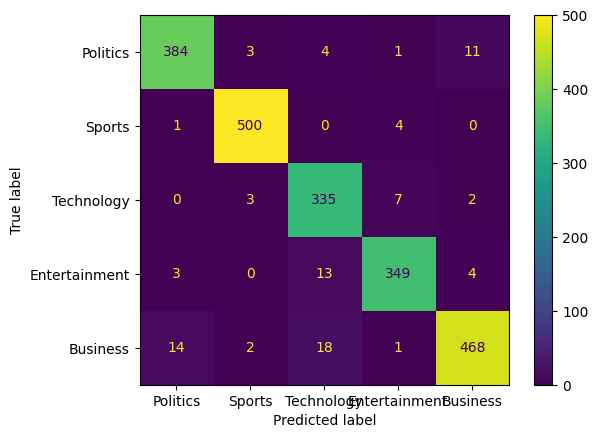

In [38]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clustered_data['Actual Category'].unique())
disp.plot();


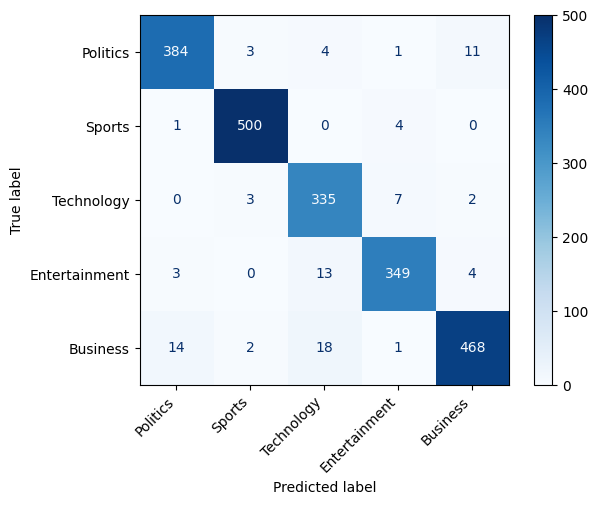

In [39]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=clustered_data['Actual Category'].unique()
)
ax = disp.plot(cmap="Blues").ax_

# Rotate xtick labels by 45°
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()


We were able to categorize the news articles with 96% accuracy

- Note that we were able to do so WITHOUT knowing the actual labels for the news articles.

### **Analyzing Incorrect Predictions**

In [40]:
# creating a dataframe of incorrect categorizations
incorrect_category_data = clustered_data[clustered_data['Actual Category'] != clustered_data['Category']].copy()
incorrect_category_data.shape

(91, 3)

In [42]:
embedding_matrix[24].reshape(1,-1)

array([[-3.89091894e-02,  3.27571854e-02,  1.84367213e-03,
        -5.83086396e-03,  6.01675585e-02,  3.99839170e-02,
         8.35593492e-02, -1.18345410e-01, -7.76456073e-02,
         4.64428551e-02, -2.95266248e-02, -5.02617545e-02,
         3.04022413e-02,  5.74795716e-02,  3.51721644e-02,
         7.98466876e-02, -3.60404551e-02, -7.27961138e-02,
        -4.79112826e-02,  2.51296200e-02,  5.57574257e-02,
         4.45613004e-02,  5.79392314e-02, -5.19734574e-03,
         6.96285665e-02, -6.41645044e-02, -1.78565513e-02,
         7.70381838e-03,  3.61743309e-02, -4.64323023e-03,
        -2.12844480e-02,  2.84408070e-02, -3.08641903e-02,
        -3.74556407e-02,  1.10003561e-01,  9.07790512e-02,
         5.40992804e-02, -1.71863921e-02, -6.01414293e-02,
        -3.79346348e-02, -1.19600765e-01,  9.33201145e-03,
        -8.53838176e-02, -4.68648598e-02,  2.57740747e-02,
         6.91596279e-03,  2.29996871e-02,  1.78320985e-02,
        -1.18079759e-01, -3.21984291e-02, -4.43798071e-0